## nubes de palabras

In [2]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

#Abrir un listado de palabras con año
# En este caso el listado se construyó manuelmente en excel
productos = pd.read_excel('normas.xlsx', sheet_name = 'productos apilados')

In [8]:
productos['Producto'] = productos['Producto'].str.replace(' ', '')

#Definir años de búsqueda
año_inicio = 1952
año_fin = 1956
años = list(range(año_inicio, año_fin))
años = list(map(str, años))

filtrado2 = productos[productos['Año'].isin(años)]
prod = filtrado2['Producto'].to_list()

In [37]:
# eliminar NaN
prod = [str(p) for p in prod] # convertir valores de tipo flotante a cadenas de texto
prod = [elem for elem in prod if not (isinstance(elem, float) and isnan(elem)) and elem.lower() != 'nan']


#unir todo en una gran string separadas por espacios
text = " ".join(prod)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


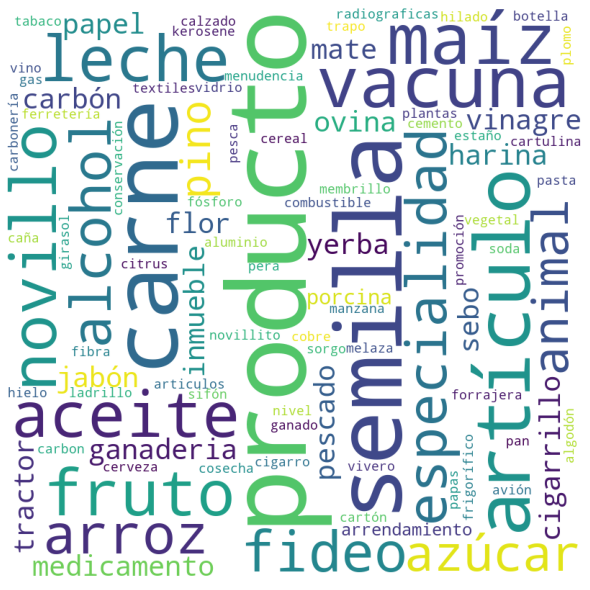

In [38]:
#una nube un poquito más depurada
#Una posible solución es aplicar técnicas de preprocesamiento de texto para normalizar las palabras, 
#como por ejemplo convertirlas a minúsculas, eliminar puntuaciones y palabras vacías.

#Por ejemplo,  aplicar estas técnicas utilizando la biblioteca NLTK de la siguiente manera:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation


# Convertir a minúsculas y eliminar puntuaciones
text = text.lower()
text = ''.join(c for c in text if c not in punctuation)

# Tokenizar el texto en palabras
words = word_tokenize(text)

# Eliminar palabras vacías
words = [word for word in words if word not in stopwords.words('spanish')]

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set(STOPWORDS), min_font_size=10).generate(' '.join(words))

# Mostrar la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [39]:
# Crear la tabla de conteos
# Contar las palabras en el texto

text2 = ' '.join(words)
word_counts = Counter(text2.lower().split())


word_table = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_table.index.name = 'word'
word_table.sort_values(by=['count'], ascending=False, inplace=True)
print(word_table)

          count
word           
producto     13
carne         9
semilla       7
artículo      6
vacuna        5
...         ...
soda          1
botella       1
sifón         1
pan           1
cobre         1

[97 rows x 1 columns]
